<a href="https://colab.research.google.com/github/hurryingauto3/WWF-Bird-Recognition-Project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cvlib 
!pip install opencv-contrib-python --force-reinstall

     |████████████████████████████████| 10.0 MB 4.4 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044620 sha256=7f6930762d71a338f22c3b611196499290258d0bb5887a6ced07a5226c95aab1
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=cef47f588fe2e6fce0f0d9cb740fb1dbd9e42e9305e3a143d312dd02d3048b4d
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar
     |████████████████████████████████| 56.1 MB 38 kB/s 
     |████████████████████████████████| 15.7 MB 74 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uni

In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, applications, optimizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
import cvlib as cv

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
def find_edges(box):

    left = box[0]
    right = box[2]
    top = box[1]
    bottom = box[3]

    return [left, right, top, bottom]

def find_box(image):
    bbox, label, conf = cv.detect_common_objects(image)

    for b, l in zip(bbox, label):
        if l == 'bird':
            box = b
    
    x0, y0, x1, y1 = box

    if abs(x0-x1) < abs(y0-y1):
        dist = abs(y0-y1) - abs(x0-x1)
        dist = dist // 2
        x0 -= dist
        x1 += dist

        x0 = max(x0, 0)
        x1 = min(x1, image.shape[1])
    
    elif abs(x0-x1) > abs(y0-y1):
        dist = abs(x0-x1) - abs(y0-y1)
        dist = dist // 2
        y0 -= dist
        y1 += dist
        
        y0 = max(0, y0)
        y1 = min(y1, image.shape[0])

    box = [x0, y0, x1, y1]

    return box

def make_square_img(crop_img):

    delta = abs(crop_img.shape[0] - crop_img.shape[1])

    if crop_img.shape[0] > crop_img.shape[1]:
        left = delta//2
        right = delta-left
        crop_img = cv2.copyMakeBorder(crop_img, 0, 0, left, right, cv2.BORDER_CONSTANT)

    elif crop_img.shape[0] < crop_img.shape[1]:
        top = delta // 2
        bottom = delta-top
        crop_img = cv2.copyMakeBorder(crop_img, top, bottom, 0, 0, cv2.BORDER_CONSTANT)
    
    return crop_img

def find_square_box(image):
    box = find_box(im)
    left, right, top, bottom = find_edges(box)
    crop_img = image[top:bottom, left:right]
    crop_img = make_square_img(crop_img)
    return crop_img


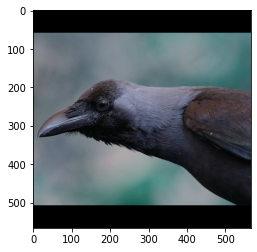

In [ ]:
im = cv2.imread('/content/drive/MyDrive/raw_data/housecrow/HC88.jpg')
im = find_square_box(im)
plt.imshow(im)
plt.show()

In [ ]:
# rootdir = '/content/drive/MyDrive/raw_data/'
# newpath = '/content/drive/MyDrive/processed/'
# bInit = ""
# for subdir, dirs, files in os.walk(rootdir):
#     n = 0
#     for file in files:
#         n += 1
#         newfolder = subdir.split("/")[-1]
#         if newfolder == "common_myna":
#           bInit = "CM"
#           newname = bInit + str(n) + ".jpg"
#         elif newfolder == "housecrow":
#           bInit = "HC"
#           newname = bInit + str(n) + ".jpg"
#         elif newfolder == "housesparrow":
#           bInit = "HS"
#           newname = bInit + str(n) + ".jpg"
#         # print(os.path.join(subdir, file))
#         try: 
#           img = find_square_box(cv2.imread(os.path.join(subdir, file)))
#           cv2.imwrite(os.path.join(newpath , bInit, newname), img)
#           cv2.waitKey(0)
#         except TypeError: 
#           pass
#         # print(os.path.join(newpath , bInit, newname))
        


In [ ]:
import shutil
shutil.make_archive('/content/drive/MyDrive/dataset', 'zip', '/content/drive/MyDrive/processed/')